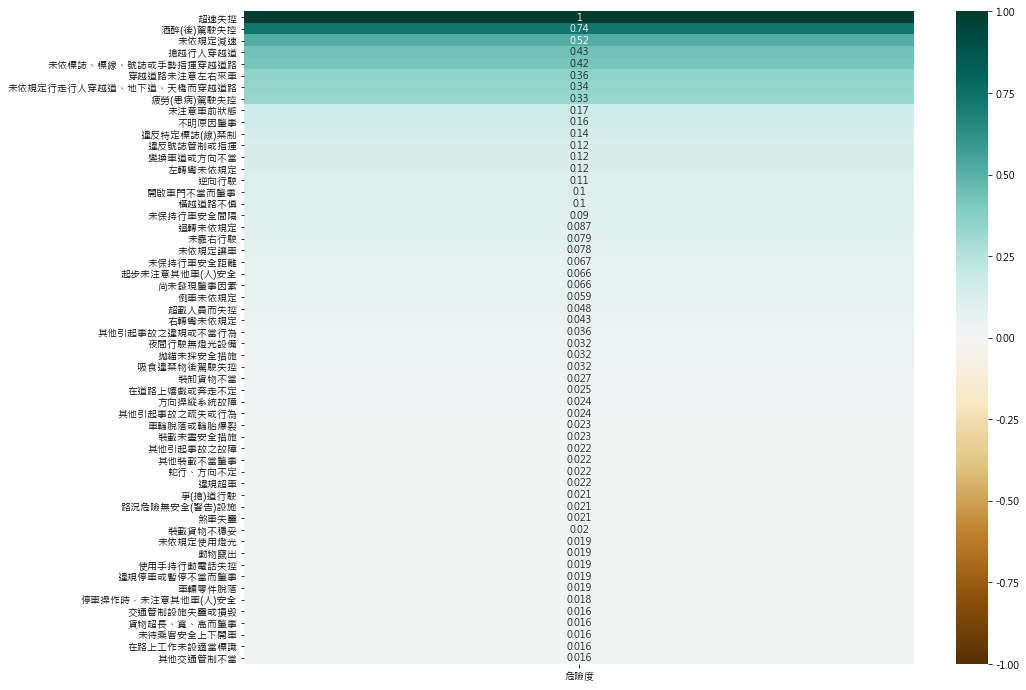

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from matplotlib.font_manager import FontProperties

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
df=pd.read_csv("110accident.csv")
s=[]
die_in_24=np.zeros(56)
die_in_30_day=np.zeros(56)
hurt=np.zeros(56)
danger=np.zeros(56)
accident_count=np.zeros(56)
nmp=df.to_numpy()
zero=np.zeros(56)
c=[]
d=[]
for i in range(0,41444,1):
    if (nmp[i,17] not in s):
        s.append(nmp[i,17])
    for j in range(0,len(s),1):
        if (nmp[i,17]==s[j]):
            die_in_24[j]=nmp[i,8]+die_in_24[j]
            die_in_30_day[j]=nmp[i,9]+die_in_30_day[j]
            hurt[j]=nmp[i,10]+hurt[j]
            accident_count[j]=accident_count[j]+1
#危險度  = (24小時內死亡人數*1000 + 2-30日內死亡人數*800 + 受傷人數*1) / 肇因發生次數 /63 
#除63是因為 讓第一個=1
for j in range(0,len(s),1):
    danger[j]=(die_in_24[j]*1000+die_in_30_day[j]*800+hurt[j]*1)/accident_count[j]/63
    c.append([s[j],die_in_24[j],die_in_30_day[j],hurt[j]])
    d.append([s[j],danger[j]])
    zero[j]=1

data=pd.DataFrame(c,columns=['肇因研判子類別名稱-主要','24小時內死亡人數','2-30日內死亡人數','受傷人數'])
data_danger=pd.DataFrame(d,columns=['肇因研判子類別名稱-主要','危險度'])
data_danger.index=s
plt.figure(figsize=(15,12))

heatmap = sns.heatmap(data_danger[['危險度']].sort_values(by='危險度', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
       